## Cake Classifier

This is a classifier that determines if an image contains a cake or does not.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
path = Path("dataset")
path

PosixPath('dataset')

In [4]:
path.ls()

[PosixPath('dataset/.DS_Store'),
 PosixPath('dataset/models'),
 PosixPath('dataset/train'),
 PosixPath('dataset/valid')]

In [5]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=32)
data = data.normalize(imagenet_stats)

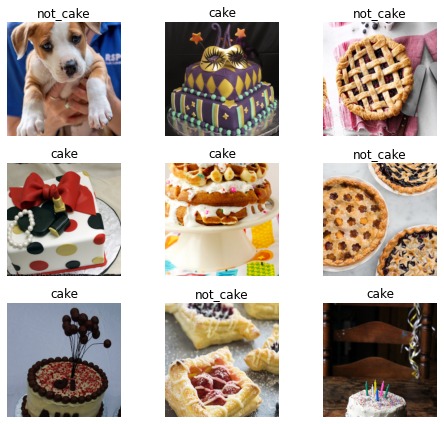

In [6]:
data.show_batch(rows=3, figsize=(7,6))

In [7]:
data.classes

['cake', 'not_cake']

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [9]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [10]:
learn.fit_one_cycle(16)

epoch,train_loss,valid_loss,error_rate,time
0,1.948801,1.971196,0.542373,00:20
1,1.736575,1.184513,0.406780,00:19
2,1.494343,0.997175,0.338983,00:19
3,1.357741,1.235376,0.305085,00:20
4,1.190176,1.518695,0.288136,00:20
5,1.010951,1.606202,0.288136,00:20
6,0.869632,1.588019,0.271186,00:20
7,0.763019,1.430156,0.254237,00:20
8,0.671677,1.273487,0.203390,00:20
9,0.604228,1.009331,0.186441,00:20


In [11]:
learn.save('stage-1')

In [10]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (59 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cake,cake,cake,cake,cake
Path: dataset;

Valid: LabelList (59 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cake,cake,cake,cake,cake
Path: dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [11]:
interp = ClassificationInterpretation.from_learner(learn)

In [12]:
losses, idxs = interp.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

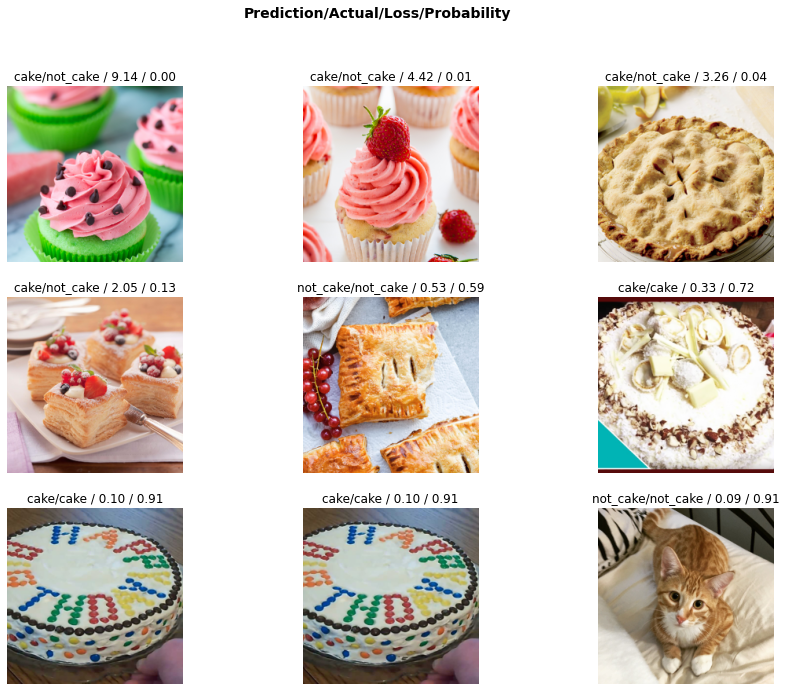

In [13]:
interp.plot_top_losses(9, figsize=(15,11))

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


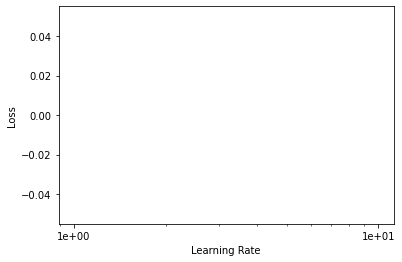

In [15]:
learn.recorder.plot()

Don't know why this plot is empty. Someone else was havign a similar problem on the fastai forums, but no one has responsed yet

In [17]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.085479,0.323982,0.067797,00:23
1,0.042700,0.305140,0.067797,00:24


Let's try now with resnet50

In [6]:
learn50 = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


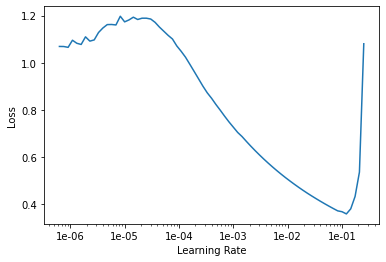

In [23]:
learn50.lr_find()
learn50.recorder.plot()

In [24]:
learn50.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.222680,0.744514,0.305085,00:31
1,0.921856,3.102160,0.508475,00:32
2,0.648833,4.464488,0.508475,00:32
3,0.579492,2.693046,0.389830,00:32
4,0.461056,1.915031,0.254237,00:31
5,0.398755,1.665102,0.203390,00:32
6,0.340147,1.382752,0.186441,00:32
7,0.294586,1.192267,0.186441,00:31


In [25]:
learn50.save('stage-1-50')

In [7]:
learn50.load('stage-1-50')

Learner(data=ImageDataBunch;

Train: LabelList (59 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cake,cake,cake,cake,cake
Path: dataset;

Valid: LabelList (59 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cake,cake,cake,cake,cake
Path: dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Con

In [11]:
learn50.unfreeze()
learn50.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.039862,0.483479,0.084746,00:35
1,0.020387,0.448137,0.067797,00:35


In [12]:
learn50.save('stage-2-50')